Irfan Khan

# q2 From the shopping list, using at least two different methods find the pair of frequent items, create a weighted network for each method, using the support threshold as weight.

In [45]:
import numpy
import time
numpy.version.version

'1.16.5'

In [46]:
# https://stackoverflow.com/questions/55188544/pandas-how-to-workaround-error-tokenizing-data
def tokenize(str):
    idx = [x for x, v in enumerate(str) if v == '\"']
    if len(idx) % 2 != 0:
        idx = idx[:-1]
    memory = {}
    for i in range(0, len(idx), 2):
        val = str[idx[i]:idx[i+1]+1]
        key = "_"*(len(val)-1)+"{0}".format(i)
        memory[key] = val
        str = str.replace(memory[key], key, 1)        
    return [memory.get(token, token) for token in str.split(",")] 

In [47]:
import numpy as np
import pandas as pd
with open("groceries.csv",encoding='utf-8',mode= "r") as fp:
    lines = fp.readlines()

lines = list(map(lambda x: tokenize(x.strip()), lines))
df = pd.DataFrame(lines).replace(np.nan, '')
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,,,,,,,...,,,,,,,,,,
1,tropical fruit,yogurt,coffee,,,,,,,,...,,,,,,,,,,
2,whole milk,,,,,,,,,,...,,,,,,,,,,
3,pip fruit,yogurt,cream cheese,meat spreads,,,,,,,...,,,,,,,,,,
4,other vegetables,whole milk,condensed milk,long life bakery product,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,,,,,,,,,,
9831,cooking chocolate,,,,,,,,,,...,,,,,,,,,,
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,,,,,,,,,,
9833,semi-finished bread,bottled water,soda,bottled beer,,,,,,,...,,,,,,,,,,


In [48]:
print(type(df),'\n',(df.shape),'\n',type(df[0]))

<class 'pandas.core.frame.DataFrame'> 
 (9835, 32) 
 <class 'pandas.core.series.Series'>


#### _Itertools.combinations_ give all combinations of _K_ items in a list

#### _Frozenset_ lets us use itemset as a key - order of elements does not matter!

# Generate and count itemsets

#### set _report=True_ in _readdata_ function to progress report, or wait for a while

In [49]:
import itertools

def readdata(k, fname="groceries.csv", report=False):
    C_k = []
    b = 0
    
    with open("groceries.csv", "rt", encoding='utf-8') as f:
        for line in f:
            line = line.replace('\n', '')  # remove newline symbol

            if line != "":
                # gather all items in one basket
                C_k.append(line)                 
            else: 
                # end of basket, report all itemsets
                for itemset in itertools.combinations(C_k, k):
                    yield frozenset(itemset)
                C_k = []
                
                # report progress
                # print every 1000th element to reduce clutter
                if report:
                    if b % 1000 == 0:  
                        print('processing bin ', b)
                    b += 1

    # last basket
    if len(C_k) > 0:
        for itemset in itertools.combinations(C_k, k):
            yield frozenset(itemset)    

In [50]:
nitems = 21
for C_k in readdata(k=2):
    print(C_k)
    
    nitems -= 1
    if nitems == 0: 
        break

frozenset({'citrus fruit,semi-finished bread,margarine,ready soups', 'tropical fruit,yogurt,coffee'})
frozenset({'citrus fruit,semi-finished bread,margarine,ready soups', 'whole milk'})
frozenset({'citrus fruit,semi-finished bread,margarine,ready soups', 'pip fruit,yogurt,cream cheese,meat spreads'})
frozenset({'citrus fruit,semi-finished bread,margarine,ready soups', 'other vegetables,whole milk,condensed milk,long life bakery product'})
frozenset({'citrus fruit,semi-finished bread,margarine,ready soups', 'whole milk,butter,yogurt,rice,abrasive cleaner'})
frozenset({'citrus fruit,semi-finished bread,margarine,ready soups', 'rolls/buns'})
frozenset({'citrus fruit,semi-finished bread,margarine,ready soups', 'other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)'})
frozenset({'citrus fruit,semi-finished bread,margarine,ready soups', 'potted plants'})
frozenset({'citrus fruit,semi-finished bread,margarine,ready soups', 'whole milk,cereals'})
frozenset({'citrus fruit,semi-fi

In [51]:
pd.options.display.max_colwidth=600

# Count all itemsets - Naive method

In [52]:
C2 = {}
for key in readdata(k=2):
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1

In [53]:
len(C2)

24574018

In [54]:
nitems = 10
for ck,n in C2.items():
    print(ck, n)
    nitems -= 1
    if nitems == 0: break

frozenset({'citrus fruit,semi-finished bread,margarine,ready soups', 'tropical fruit,yogurt,coffee'}) 1
frozenset({'citrus fruit,semi-finished bread,margarine,ready soups', 'whole milk'}) 121
frozenset({'citrus fruit,semi-finished bread,margarine,ready soups', 'pip fruit,yogurt,cream cheese,meat spreads'}) 1
frozenset({'citrus fruit,semi-finished bread,margarine,ready soups', 'other vegetables,whole milk,condensed milk,long life bakery product'}) 1
frozenset({'citrus fruit,semi-finished bread,margarine,ready soups', 'whole milk,butter,yogurt,rice,abrasive cleaner'}) 1
frozenset({'citrus fruit,semi-finished bread,margarine,ready soups', 'rolls/buns'}) 109
frozenset({'citrus fruit,semi-finished bread,margarine,ready soups', 'other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)'}) 1
frozenset({'citrus fruit,semi-finished bread,margarine,ready soups', 'potted plants'}) 10
frozenset({'citrus fruit,semi-finished bread,margarine,ready soups', 'whole milk,cereals'}) 3
frozenset

### s = 10

In [55]:
%time
start_time_naive10 = time.time()
s = 10 # support threshold
L2s10 = {}
for key, n in C2.items():
    if n >= s:
        L2s10[key] = n
print('{} items with >{} occurances'.format(len(L2s10), s))

Wall time: 0 ns
512523 items with >10 occurances


In [56]:
naive_result_s10=L2s10
end_time_naive10 = time.time()
time_naive10 = start_time_naive10-end_time_naive10
L2s10

{frozenset({'citrus fruit,semi-finished bread,margarine,ready soups',
            'whole milk'}): 121,
 frozenset({'citrus fruit,semi-finished bread,margarine,ready soups',
            'rolls/buns'}): 109,
 frozenset({'citrus fruit,semi-finished bread,margarine,ready soups',
            'potted plants'}): 10,
 frozenset({'beef',
            'citrus fruit,semi-finished bread,margarine,ready soups'}): 26,
 frozenset({'citrus fruit,semi-finished bread,margarine,ready soups',
            'fruit/vegetable juice'}): 22,
 frozenset({'chocolate',
            'citrus fruit,semi-finished bread,margarine,ready soups'}): 35,
 frozenset({'citrus fruit,semi-finished bread,margarine,ready soups',
            'specialty bar'}): 21,
 frozenset({'citrus fruit,semi-finished bread,margarine,ready soups',
            'other vegetables'}): 62,
 frozenset({'citrus fruit,semi-finished bread,margarine,ready soups',
            'yogurt'}): 40,
 frozenset({'citrus fruit,semi-finished bread,margarine,ready soups'

In [57]:
type(L2s10),type(naive_result_s10),len(L2s10),len(naive_result_s10)

(dict, dict, 512523, 512523)

In [58]:
!pip install networkx

In [59]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
# create DataFrame using data
dfs10n=pd.DataFrame(naive_result_s10.items(), columns=['basket', 'count'])
dfs10n.head(10)

,basket,count
0,"(citrus fruit,semi-finished bread,margarine,ready soups, whole milk)",121
1,"(citrus fruit,semi-finished bread,margarine,ready soups, rolls/buns)",109
2,"(citrus fruit,semi-finished bread,margarine,ready soups, potted plants)",10
3,"(citrus fruit,semi-finished bread,margarine,ready soups, beef)",26
4,"(citrus fruit,semi-finished bread,margarine,ready soups, fruit/vegetable juice)",22
5,"(citrus fruit,semi-finished bread,margarine,ready soups, chocolate)",35
6,"(citrus fruit,semi-finished bread,margarine,ready soups, specialty bar)",21
7,"(citrus fruit,semi-finished bread,margarine,ready soups, other vegetables)",62
8,"(citrus fruit,semi-finished bread,margarine,ready soups, yogurt)",40
9,"(citrus fruit,semi-finished bread,margarine,ready soups, pastry,soda)",27


In [61]:
MG = nx.MultiGraph()
G_naive_s10=nx.from_pandas_edgelist(dfs10n,source='basket',target='count')

#MG = nx.MultiGraph()
#G_naive_s10=MG.add_weighted_edges_from(dfs10n)
#

In [62]:
type(G_naive_s10)

networkx.classes.graph.Graph

In [63]:
#nx.clustering(G_naive_s10)

In [64]:
G_naive_s10.__len__() # number of nodes

513176

In [ ]:
#G_naive_s10.degree

C:\Users\thin_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


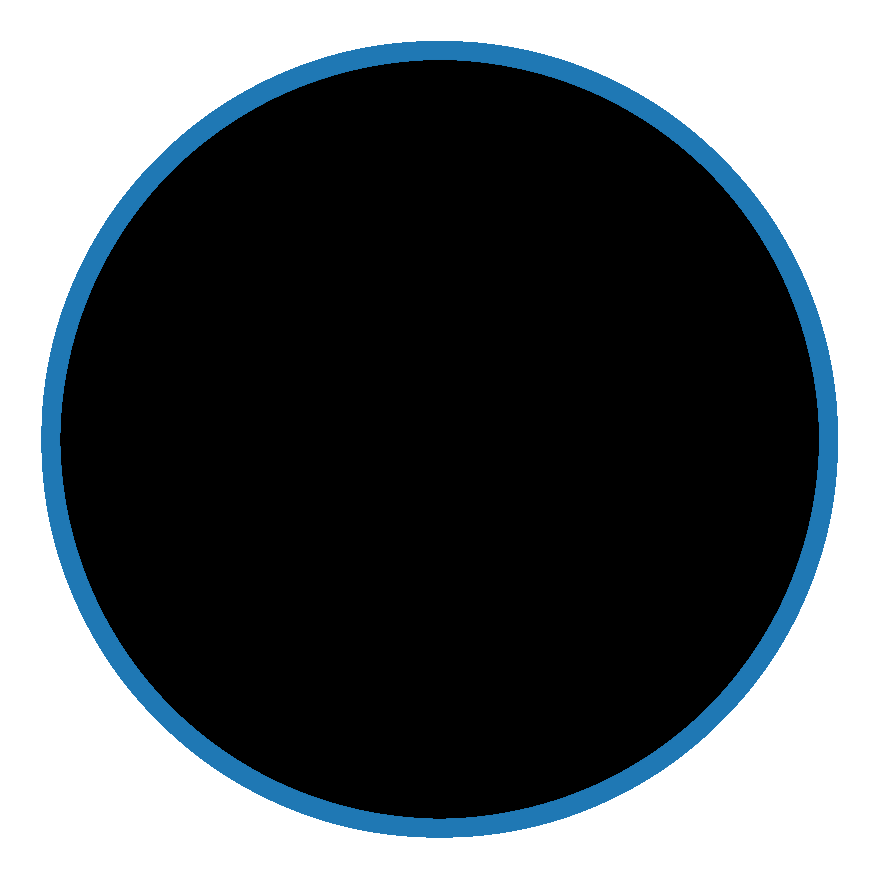

In [65]:
plt.figure(figsize=(12, 12))
nx.draw_circular(G_naive_s10)#, with_labels=True, font_weight='bold')

In [ ]:
#nx.draw(G_naive_s10,pos=nx.spring_layout(G_naive_s10))
#nx.draw_graphviz(G_naive_s10, 'neato')

In [ ]:
#pos = nx.nx_agraph.graphviz_layout(G_naive_s10)

#nx.draw(G_naive_s10, pos=pos)

(array([5.1316e+05, 9.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 8.27460e+03, 1.65482e+04, 2.48218e+04, 3.30954e+04,
        4.13690e+04, 4.96426e+04, 5.79162e+04, 6.61898e+04, 7.44634e+04,
        8.27370e+04]),
 <a list of 10 Patch objects>)

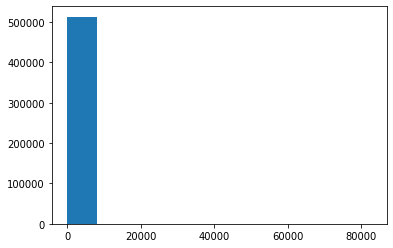

In [66]:
plt.hist([v for k,v in nx.degree(G_naive_s10)])

### s = 50 

In [67]:
%time
start_time_naive50 = time.time()
s = 50 # support threshold
L2s50 = {}
for key, n in C2.items():
    if n >= s:
        L2s50[key] = n
print('{} items with >{} occurances'.format(len(L2s50), s))

Wall time: 0 ns
69002 items with >50 occurances


In [68]:
naive_result_s50=L2s50
end_time_naive50 = time.time()
time_naive50 = start_time_naive50-end_time_naive50
L2s50

{frozenset({'citrus fruit,semi-finished bread,margarine,ready soups',
            'whole milk'}): 121,
 frozenset({'citrus fruit,semi-finished bread,margarine,ready soups',
            'rolls/buns'}): 109,
 frozenset({'citrus fruit,semi-finished bread,margarine,ready soups',
            'other vegetables'}): 62,
 frozenset({'canned beer',
            'citrus fruit,semi-finished bread,margarine,ready soups'}): 260,
 frozenset({'bottled water',
            'citrus fruit,semi-finished bread,margarine,ready soups'}): 67,
 frozenset({'citrus fruit,semi-finished bread,margarine,ready soups',
            'soda'}): 156,
 frozenset({'citrus fruit,semi-finished bread,margarine,ready soups',
            'newspapers'}): 54,
 frozenset({'bottled beer',
            'citrus fruit,semi-finished bread,margarine,ready soups'}): 120,
 frozenset({'tropical fruit,yogurt,coffee', 'whole milk'}): 121,
 frozenset({'rolls/buns', 'tropical fruit,yogurt,coffee'}): 109,
 frozenset({'other vegetables', 'tropical f

In [69]:
# create DataFrame using data
dfs50n=pd.DataFrame(naive_result_s50.items(), columns=['basket', 'count'])
dfs50n.head(10)

,basket,count
0,"(citrus fruit,semi-finished bread,margarine,ready soups, whole milk)",121
1,"(citrus fruit,semi-finished bread,margarine,ready soups, rolls/buns)",109
2,"(citrus fruit,semi-finished bread,margarine,ready soups, other vegetables)",62
3,"(citrus fruit,semi-finished bread,margarine,ready soups, canned beer)",260
4,"(citrus fruit,semi-finished bread,margarine,ready soups, bottled water)",67
5,"(citrus fruit,semi-finished bread,margarine,ready soups, soda)",156
6,"(citrus fruit,semi-finished bread,margarine,ready soups, newspapers)",54
7,"(citrus fruit,semi-finished bread,margarine,ready soups, bottled beer)",120
8,"(whole milk, tropical fruit,yogurt,coffee)",121
9,"(rolls/buns, tropical fruit,yogurt,coffee)",109


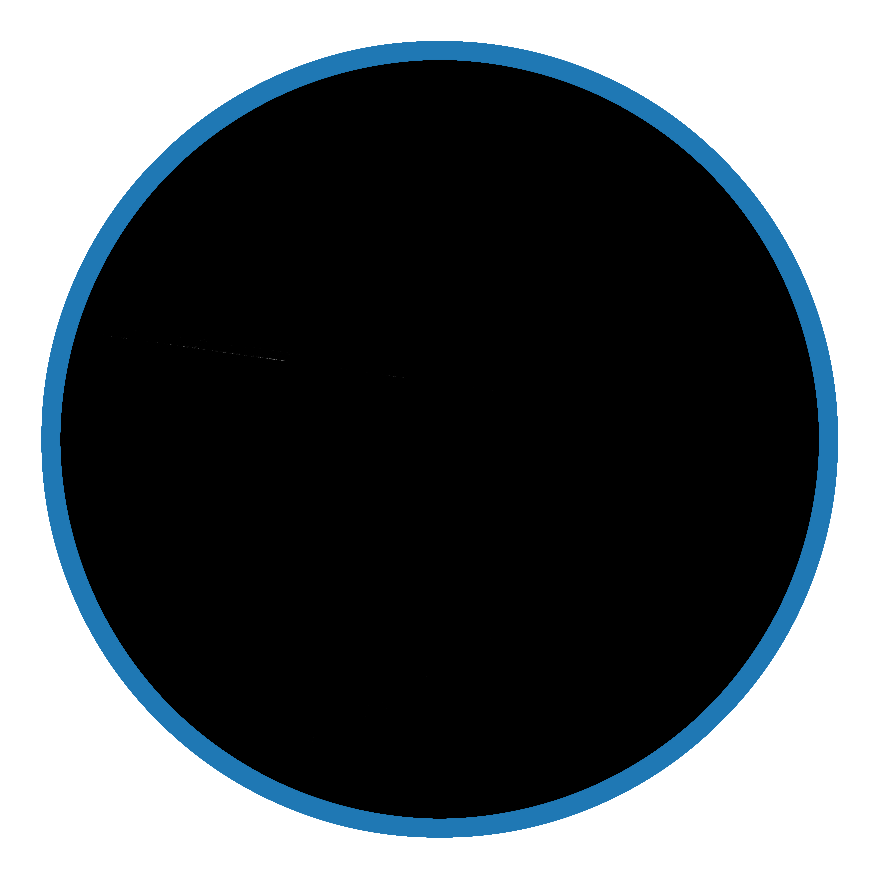

In [72]:
plt.figure(figsize=(12, 12))
G_naive_s50=nx.from_pandas_edgelist(dfs50n,source='basket',target='count')
nx.draw_circular(G_naive_s50)

(array([6.961e+04, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 5.000e+00]),
 array([1.0000e+00, 7.3350e+02, 1.4660e+03, 2.1985e+03, 2.9310e+03,
        3.6635e+03, 4.3960e+03, 5.1285e+03, 5.8610e+03, 6.5935e+03,
        7.3260e+03]),
 <a list of 10 Patch objects>)

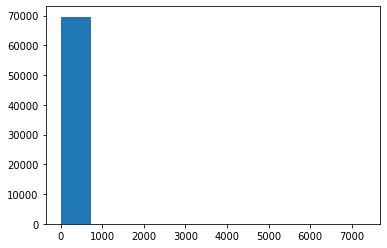

In [71]:
plt.hist([v for k,v in nx.degree(G_naive_s50)])

### s = 100 

In [73]:
%time
start_time_naive100 = time.time()
s = 100 # support threshold
L2s100 = {}
for key, n in C2.items():
    if n >= s:
        L2s100[key] = n
print('{} items with >{} occurances'.format(len(L2s100), s))

Wall time: 999 µs
41117 items with >100 occurances


In [74]:
naive_result_s100=L2s100
end_time_naive100 = time.time()
time_naive100 = start_time_naive100-end_time_naive100
L2s100

{frozenset({'citrus fruit,semi-finished bread,margarine,ready soups',
            'whole milk'}): 121,
 frozenset({'citrus fruit,semi-finished bread,margarine,ready soups',
            'rolls/buns'}): 109,
 frozenset({'canned beer',
            'citrus fruit,semi-finished bread,margarine,ready soups'}): 260,
 frozenset({'citrus fruit,semi-finished bread,margarine,ready soups',
            'soda'}): 156,
 frozenset({'bottled beer',
            'citrus fruit,semi-finished bread,margarine,ready soups'}): 120,
 frozenset({'tropical fruit,yogurt,coffee', 'whole milk'}): 121,
 frozenset({'rolls/buns', 'tropical fruit,yogurt,coffee'}): 109,
 frozenset({'canned beer', 'tropical fruit,yogurt,coffee'}): 260,
 frozenset({'soda', 'tropical fruit,yogurt,coffee'}): 156,
 frozenset({'bottled beer', 'tropical fruit,yogurt,coffee'}): 120,
 frozenset({'pip fruit,yogurt,cream cheese,meat spreads', 'whole milk'}): 121,
 frozenset({'other vegetables,whole milk,condensed milk,long life bakery product',
    

In [75]:
# create DataFrame using data
dfs100n=pd.DataFrame(naive_result_s100.items(), columns=['basket', 'count'])
dfs100n.head(10)

,basket,count
0,"(citrus fruit,semi-finished bread,margarine,ready soups, whole milk)",121
1,"(citrus fruit,semi-finished bread,margarine,ready soups, rolls/buns)",109
2,"(citrus fruit,semi-finished bread,margarine,ready soups, canned beer)",260
3,"(citrus fruit,semi-finished bread,margarine,ready soups, soda)",156
4,"(citrus fruit,semi-finished bread,margarine,ready soups, bottled beer)",120
5,"(whole milk, tropical fruit,yogurt,coffee)",121
6,"(rolls/buns, tropical fruit,yogurt,coffee)",109
7,"(canned beer, tropical fruit,yogurt,coffee)",260
8,"(soda, tropical fruit,yogurt,coffee)",156
9,"(bottled beer, tropical fruit,yogurt,coffee)",120


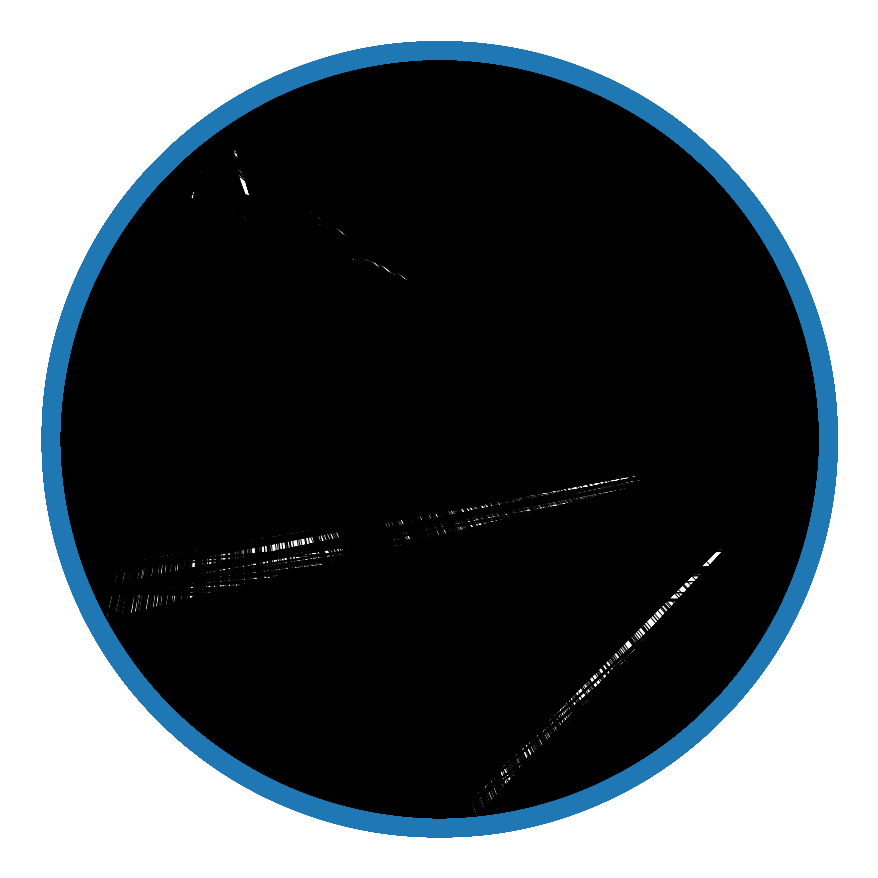

In [76]:
plt.figure(figsize=(12, 12))
G_naive_s100=nx.from_pandas_edgelist(dfs100n,source='basket',target='count')
nx.draw_circular(G_naive_s100)

(array([4.1693e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00]),
 array([1.0000e+00, 6.8070e+02, 1.3604e+03, 2.0401e+03, 2.7198e+03,
        3.3995e+03, 4.0792e+03, 4.7589e+03, 5.4386e+03, 6.1183e+03,
        6.7980e+03]),
 <a list of 10 Patch objects>)

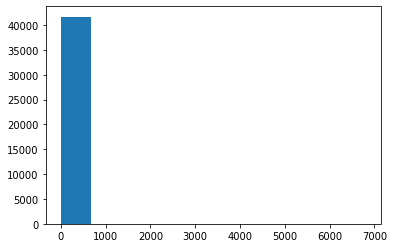

In [77]:
plt.hist([v for k,v in nx.degree(G_naive_s100)])

# A-Priori algorithm

### N = 10 

In [78]:
N10 = 10  # frequency threshold
start_time_apriori10=time.time()

In [79]:
%time
# find frequent 1-tuples (individual items)
C1N10 = {}
for key in readdata(k=1, report=False):
    if key not in C1N10:
        C1N10[key] = 1
    else:
        C1N10[key] += 1    
        
print("{} items".format(len(C1N10)))

Wall time: 0 ns
7011 items


In [80]:
%time
# filter stage
L1N10 = {}
for key, count in C1N10.items():
    if count >= N10:
        L1N10[key] = count
print('{} items with >{} occurances'.format(len(L1N10), N10))

Wall time: 0 ns
70 items with >10 occurances


In [81]:
C2N10_items = set([a.union(b) for a in L1N10.keys() for b in L1N10.keys()])

In [82]:
len(C2N10_items)

2485

In [83]:
%time
# find frequent 2-tuples
C2N10 = {}
for key in readdata(k=2):
    # filter out non-frequent tuples
    if key not in C2N10_items:
        continue

    # record frequent tuples
    if key not in C2N10:
        C2N10[key] = 1
    else:
        C2N10[key] += 1
        
print("{} items".format(len(C2N10)))

Wall time: 0 ns
2485 items


In [84]:
%time
# filter stage
L2N10 = {}
for key, count in C2N10.items():
    if count >= N10:
        L2N10[key] = count
print('{} items with > {} occurances'.format(len(L2N10), N10))
end_time_apriori10=time.time()
time_apriori10=start_time_apriori10-end_time_apriori10

Wall time: 0 ns
2485 items with > 10 occurances


In [85]:
# create DataFrame using data
dfs10a=pd.DataFrame(L2N10.items(), columns=['basket', 'count'])
dfs10a.head(10)

,basket,count
0,"(rolls/buns, whole milk)",13189
1,"(potted plants, whole milk)",1210
2,"(beef, whole milk)",3146
3,"(fruit/vegetable juice, whole milk)",2662
4,"(chocolate, whole milk)",4235
5,"(specialty bar, whole milk)",2541
6,"(other vegetables, whole milk)",7502
7,(whole milk),7260
8,"(yogurt, whole milk)",4840
9,"(pastry,soda, whole milk)",3267


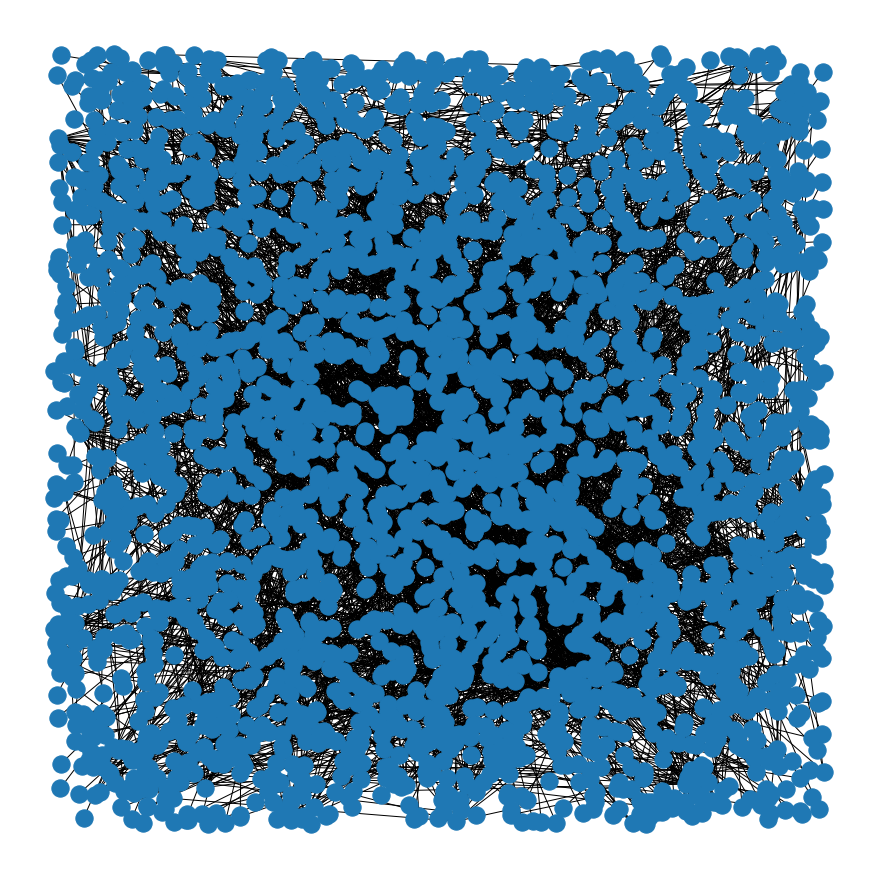

In [100]:
plt.figure(figsize=(12, 12))
G_apriori_n10=nx.from_pandas_edgelist(dfs10a,source='basket',target='count')
nx.draw_random(G_apriori_n10)

(array([2.947e+03, 3.600e+01, 1.000e+01, 6.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. , 10.5, 20. , 29.5, 39. , 48.5, 58. , 67.5, 77. , 86.5, 96. ]),
 <a list of 10 Patch objects>)

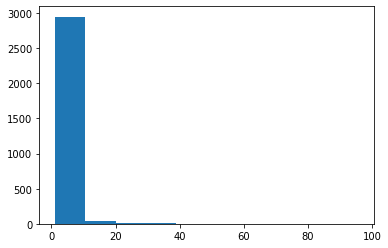

In [87]:
plt.hist([v for k,v in nx.degree(G_apriori_n10)])

### N = 50 

In [88]:
N50 = 50  # frequency threshold
start_time_apriori50=time.time()

In [89]:
%time
# find frequent 1-tuples (individual items)
C1N50 = {}
for key in readdata(k=1, report=False):
    if key not in C1N50:
        C1N50[key] = 1
    else:
        C1N50[key] += 1    
        
print("{} items".format(len(C1N50)))

Wall time: 0 ns
7011 items


In [90]:
%time
# filter stage
L1N50 = {}
for key, count in C1N50.items():
    if count >= N50:
        L1N50[key] = count
print('{} items with >{} occurances'.format(len(L1N50), N50))

Wall time: 0 ns
8 items with >50 occurances


In [91]:
C2N50_items = set([a.union(b) for a in L1N50.keys() for b in L1N50.keys()])

In [92]:
len(C2N50_items)

36

In [93]:
%time
# find frequent 2-tuples
C2N50 = {}
for key in readdata(k=2):
    # filter out non-frequent tuples
    if key not in C2N50_items:
        continue

    # record frequent tuples
    if key not in C2N50:
        C2N50[key] = 1
    else:
        C2N50[key] += 1
        
print("{} items".format(len(C2N50)))

Wall time: 0 ns
36 items


In [94]:
%time
# filter stage
L2N50 = {}
for key, count in C2N50.items():
    if count >= N50:
        L2N50[key] = count
print('{} items with > {} occurances'.format(len(L2N50), N50))
end_time_apriori50=time.time()
time_apriori50=start_time_apriori50-end_time_apriori50

Wall time: 0 ns
36 items with > 50 occurances


In [95]:
# create DataFrame using data
dfs50a=pd.DataFrame(L2N50.items(), columns=['basket', 'count'])
dfs50a.head(10)

,basket,count
0,"(rolls/buns, whole milk)",13189
1,"(other vegetables, whole milk)",7502
2,(whole milk),7260
3,"(canned beer, whole milk)",31460
4,"(bottled water, whole milk)",8107
5,"(soda, whole milk)",18876
6,"(newspapers, whole milk)",6534
7,"(bottled beer, whole milk)",14520
8,"(rolls/buns, other vegetables)",6758
9,"(rolls/buns, canned beer)",28340


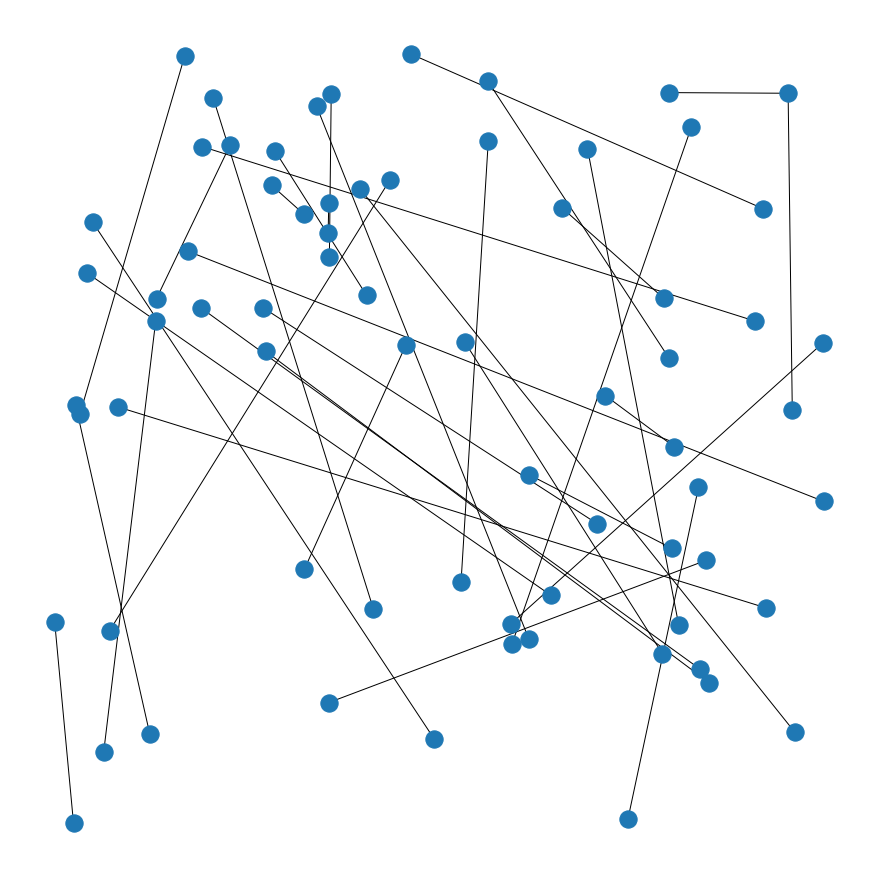

In [101]:
plt.figure(figsize=(12, 12))
G_apriori_n50=nx.from_pandas_edgelist(dfs50a,source='basket',target='count')
nx.draw_random(G_apriori_n50)

(array([70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

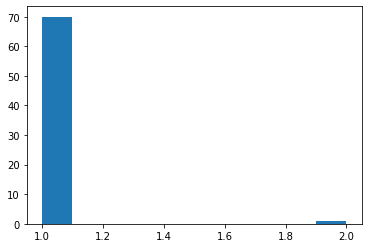

In [97]:
plt.hist([v for k,v in nx.degree(G_apriori_n50)])

### N = 100 

In [102]:
N100 = 100  # frequency threshold
start_time_apriori100=time.time()

In [103]:
%time
# find frequent 1-tuples (individual items)
C1N100 = {}
for key in readdata(k=1, report=False):
    if key not in C1N100:
        C1N100[key] = 1
    else:
        C1N100[key] += 1    
        
print("{} items".format(len(C1N100)))

Wall time: 0 ns
7011 items


In [104]:
%time
# filter stage
L1N100 = {}
for key, count in C1N100.items():
    if count >= N100:
        L1N100[key] = count
print('{} items with >{} occurances'.format(len(L1N100), N100))

Wall time: 0 ns
5 items with >100 occurances


A-Priori filtering, first option: Generate all possible tuples of frequent items

In [105]:
C2N100_items = set([a.union(b) for a in L1N100.keys() for b in L1N100.keys()])

In [106]:
len(C2N100_items)

15

In [107]:
%time
# find frequent 2-tuples
C2N100 = {}
for key in readdata(k=2):
    # filter out non-frequent tuples
    if key not in C2N100_items:
        continue

    # record frequent tuples
    if key not in C2N100:
        C2N100[key] = 1
    else:
        C2N100[key] += 1
        
print("{} items".format(len(C2N100)))

Wall time: 0 ns
15 items


In [108]:
# filter stage
L2N100 = {}
for key, count in C2N100.items():
    if count >= N100:
        L2N100[key] = count
print('{} items with > {} occurances'.format(len(L2N100), N100))
end_time_apriori100=time.time()
time_apriori100=start_time_apriori100-end_time_apriori100

15 items with > 100 occurances


In [109]:
plt.figure(figsize=(12, 12))
# create DataFrame using data
dfs100a=pd.DataFrame(L2N100.items(), columns=['basket', 'count'])
dfs100a.head(10)

,basket,count
0,"(rolls/buns, whole milk)",13189
1,(whole milk),7260
2,"(canned beer, whole milk)",31460
3,"(soda, whole milk)",18876
4,"(bottled beer, whole milk)",14520
5,"(rolls/buns, canned beer)",28340
6,(rolls/buns),5886
7,"(rolls/buns, soda)",17004
8,"(rolls/buns, bottled beer)",13080
9,(canned beer),33670


<Figure size 864x864 with 0 Axes>

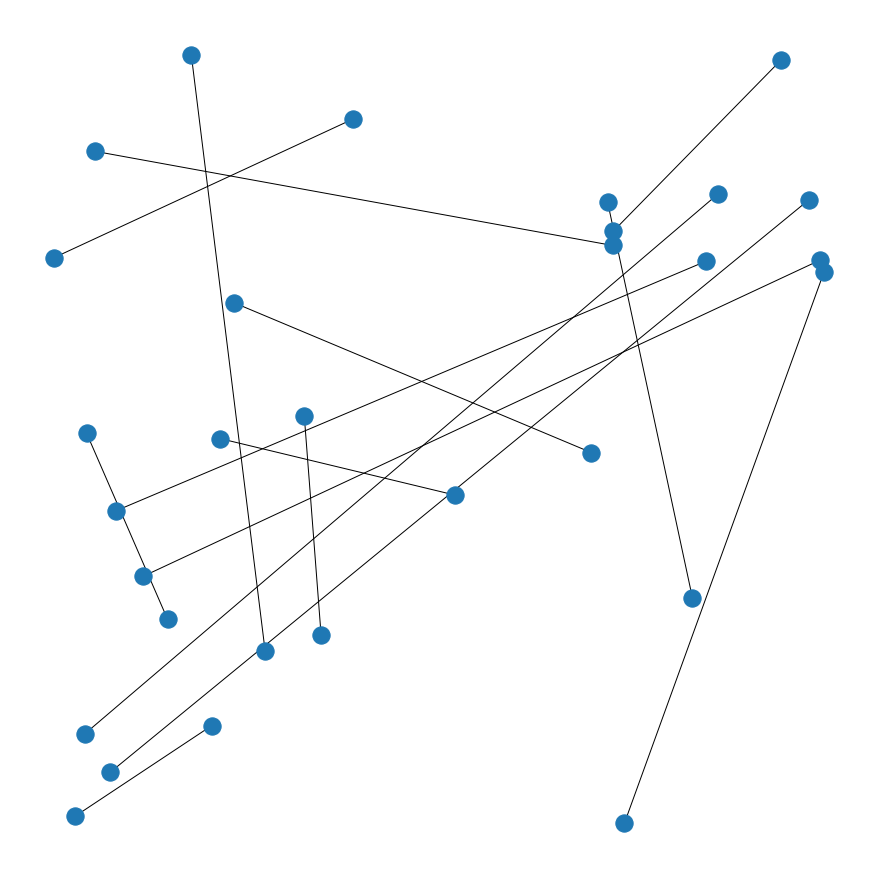

In [112]:
plt.figure(figsize=(12, 12))
G_apriori_n100=nx.from_pandas_edgelist(dfs100a,source='basket',target='count')
nx.draw_random(G_apriori_n100)

(array([ 0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

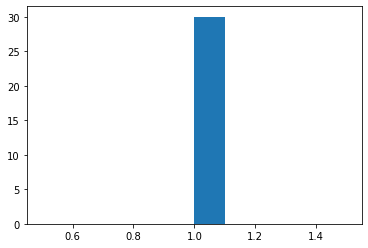

In [111]:
plt.hist([v for k,v in nx.degree(G_apriori_n100)])

### PCY improvement A-priori

#### Using one hash table

In [113]:
N=10

In [114]:
# hash table
max_hash1 = 10*1000000
H1 = np.zeros((max_hash1,), dtype=np.int)
for key in readdata(k=2, report=True):
    hash_cell_1 = hash(key) % max_hash1
    H1[hash_cell_1] += 1

In [115]:
# find frequent 2-tuples
C2 = {}
for key in readdata(k=2):
    # hash-based filtering stage from PCY
    hash_cell_1 = hash(key) % max_hash1
    if H1[hash_cell_1] < N:
        continue

    # filter out non-frequent tuples
    if key not in C2N10_items:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1
        
print("{} items".format(len(C2)))

2485 items


In [116]:
# filter stage
L2 = {}
for key, count in C2.items():
    if count >= N:
        L2[key] = count
print('{} items with >{} occurances'.format(len(L2), N))

2485 items with >10 occurances


#### Using compacted hash table indexes - takes less memory!

In [117]:
start_time_pcy10 = time.time()
# hash table
max_hash1 = 10*1000000
H1 = np.zeros((max_hash1,), dtype=np.int)
for key in readdata(k=2, report=True):
    hash_cell_1 = hash(key) % max_hash1
    H1[hash_cell_1] += 1

In [118]:
# compact hash table
H_good_1 = set(np.where(H1 >= N10)[0])

del H1

In [119]:
# find frequent 2-tuples
C2 = {}
for key in readdata(k=2):
    # hash-based filtering stage from PCY
    hash_cell_1 = hash(key) % max_hash1
    if hash_cell_1 not in H_good_1:
        continue

    # filter out non-frequent tuples
    if key not in C2N10_items:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1
        
print("{} items".format(len(C2)))

2485 items


In [120]:
# filter stage
L2_PCY_N10 = {}
for key, count in C2.items():
    if count >= N10:
        L2_PCY_N10[key] = count
print('{} items with >{} occurances'.format(len(L2_PCY_N10), N10))
end_time_pcy10=time.time()
time_pcy10=start_time_pcy10-end_time_pcy10

2485 items with >10 occurances


###  Generate rules A -> B

In [121]:
L2_PCY_N10 = [ elem for elem in list(L2_PCY_N10) if len(elem)>1] # clean our list a bit. 

for i in range(len(L2_PCY_N10)):

    A, B = list(L2_PCY_N10[i])
    support_AB = C2[frozenset([A, B])]
    support_A = C1N10[frozenset([A])]
    conf_A_leads_to_B = support_AB / support_A
    
    support_B = C1N10[frozenset([B])]
    prob_B = support_B / 2750.0
    
    interest_A_leads_to_B = conf_A_leads_to_B - prob_B
    
    if interest_A_leads_to_B > 0.7:
        print("{} --> {} with interest {:3f}".format(A, B, interest_A_leads_to_B))

rolls/buns --> whole milk with interest 120.956000
potted plants --> whole milk with interest 120.956000
beef --> whole milk with interest 120.956000
fruit/vegetable juice --> whole milk with interest 120.956000
chocolate --> whole milk with interest 120.956000
specialty bar --> whole milk with interest 120.956000
other vegetables --> whole milk with interest 120.956000
yogurt --> whole milk with interest 120.956000
pastry,soda --> whole milk with interest 120.956000
canned beer --> whole milk with interest 120.956000
coffee --> whole milk with interest 120.956000
misc. beverages --> whole milk with interest 120.956000
bottled water --> whole milk with interest 120.956000
soda --> whole milk with interest 120.956000
berries --> whole milk with interest 120.956000
detergent --> whole milk with interest 120.956000
sparkling wine --> whole milk with interest 120.956000
newspapers --> whole milk with interest 120.956000
frankfurter,rolls/buns --> whole milk with interest 120.956000
bottled

white wine --> pastry,soda with interest 26.990182
rolls/buns,soda --> pastry,soda with interest 26.990182
ice cream --> pastry,soda with interest 26.990182
liquor --> pastry,soda with interest 26.990182
pork --> pastry,soda with interest 26.990182
root vegetables --> pastry,soda with interest 26.990182
sausage --> pastry,soda with interest 26.990182
candy --> pastry,soda with interest 26.990182
sausage,rolls/buns --> pastry,soda with interest 26.990182
photo/film --> pastry,soda with interest 26.990182
chicken --> pastry,soda with interest 26.990182
shopping bags --> pastry,soda with interest 26.990182
oil --> pastry,soda with interest 26.990182
citrus fruit --> pastry,soda with interest 26.990182
frozen vegetables --> pastry,soda with interest 26.990182
rolls/buns,bottled beer --> pastry,soda with interest 26.990182
bottled beer,liquor --> pastry,soda with interest 26.990182
hamburger meat --> pastry,soda with interest 26.990182
pastry --> pastry,soda with interest 26.990182
bottled 

frozen meals --> soda with interest 155.943273
soda --> dishes with interest 9.996364
soda --> pet care with interest 9.996364
detergent --> berries with interest 9.996364
berries --> sparkling wine with interest 9.996364
berries --> newspapers with interest 53.980364
frankfurter,rolls/buns --> berries with interest 9.996364
bottled beer --> berries with interest 9.996364
berries --> rolls/buns,canned beer with interest 13.994909
specialty chocolate --> berries with interest 9.996364
berries --> beverages with interest 25.990545
white wine --> berries with interest 9.996364
berries --> rolls/buns,soda with interest 22.991636
ice cream --> berries with interest 9.996364
liquor --> berries with interest 9.996364
berries --> pork with interest 26.990182
root vegetables --> berries with interest 9.996364
sausage --> berries with interest 9.996364
berries --> candy with interest 11.995636
berries --> sausage,rolls/buns with interest 11.995636
berries --> photo/film with interest 26.990182
c

frozen vegetables --> chewing gum with interest 14.994545
frozen vegetables --> soda,canned beer with interest 14.994545
frozen vegetables --> rolls/buns,brown bread with interest 9.996364
frozen vegetables --> pip fruit with interest 27.989818
frozen vegetables --> UHT-milk with interest 9.996364
frozen vegetables --> whole milk,rolls/buns with interest 12.995273
frozen vegetables --> waffles with interest 20.992364
napkins --> frozen vegetables with interest 12.995273
frozen vegetables --> long life bakery product with interest 10.996000
canned beer,shopping bags --> frozen vegetables with interest 12.995273
frozen vegetables --> butter with interest 10.996000
frozen vegetables --> frozen meals with interest 15.994182
frozen vegetables --> dishes with interest 9.996364
frozen vegetables --> pet care with interest 9.996364
rolls/buns,bottled beer --> bottled beer,liquor with interest 10.996000
rolls/buns,bottled beer --> hamburger meat with interest 10.996000
rolls/buns,bottled beer -

frankfurter --> long life bakery product with interest 10.996000
canned beer,shopping bags --> frankfurter with interest 10.996000
frankfurter --> butter with interest 10.996000
frozen meals --> frankfurter with interest 10.996000
frankfurter --> dishes with interest 9.996364
frankfurter --> pet care with interest 9.996364
tropical fruit --> whipped/sour cream with interest 25.990545
sugar --> tropical fruit with interest 22.991636
tropical fruit --> sausage,rolls/buns,soda with interest 9.996364
tropical fruit --> soda,bottled beer with interest 9.996364
hygiene articles --> tropical fruit with interest 22.991636
tropical fruit --> brown bread with interest 19.992727
tropical fruit --> whole milk,pastry with interest 11.995636
tropical fruit --> chewing gum with interest 14.994545
tropical fruit --> soda,canned beer with interest 14.994545
tropical fruit --> rolls/buns,brown bread with interest 9.996364
tropical fruit --> pip fruit with interest 27.989818
tropical fruit --> UHT-milk w

In [122]:
L2_PCY_N10

[frozenset({'rolls/buns', 'whole milk'}),
 frozenset({'potted plants', 'whole milk'}),
 frozenset({'beef', 'whole milk'}),
 frozenset({'fruit/vegetable juice', 'whole milk'}),
 frozenset({'chocolate', 'whole milk'}),
 frozenset({'specialty bar', 'whole milk'}),
 frozenset({'other vegetables', 'whole milk'}),
 frozenset({'whole milk', 'yogurt'}),
 frozenset({'pastry,soda', 'whole milk'}),
 frozenset({'canned beer', 'whole milk'}),
 frozenset({'coffee', 'whole milk'}),
 frozenset({'misc. beverages', 'whole milk'}),
 frozenset({'bottled water', 'whole milk'}),
 frozenset({'soda', 'whole milk'}),
 frozenset({'berries', 'whole milk'}),
 frozenset({'detergent', 'whole milk'}),
 frozenset({'sparkling wine', 'whole milk'}),
 frozenset({'newspapers', 'whole milk'}),
 frozenset({'frankfurter,rolls/buns', 'whole milk'}),
 frozenset({'bottled beer', 'whole milk'}),
 frozenset({'rolls/buns,canned beer', 'whole milk'}),
 frozenset({'specialty chocolate', 'whole milk'}),
 frozenset({'beverages', 'who

In [123]:
# create DataFrame using data
# dfs100a=pd.DataFrame(L2N100.items(), columns=['basket', 'count'])
dfs10pcy=pd.DataFrame(L2_PCY_N10, columns=['source', 'target'])
dfs10pcy.head(10)

,source,target
0,rolls/buns,whole milk
1,potted plants,whole milk
2,beef,whole milk
3,fruit/vegetable juice,whole milk
4,chocolate,whole milk
5,specialty bar,whole milk
6,other vegetables,whole milk
7,yogurt,whole milk
8,"pastry,soda",whole milk
9,canned beer,whole milk


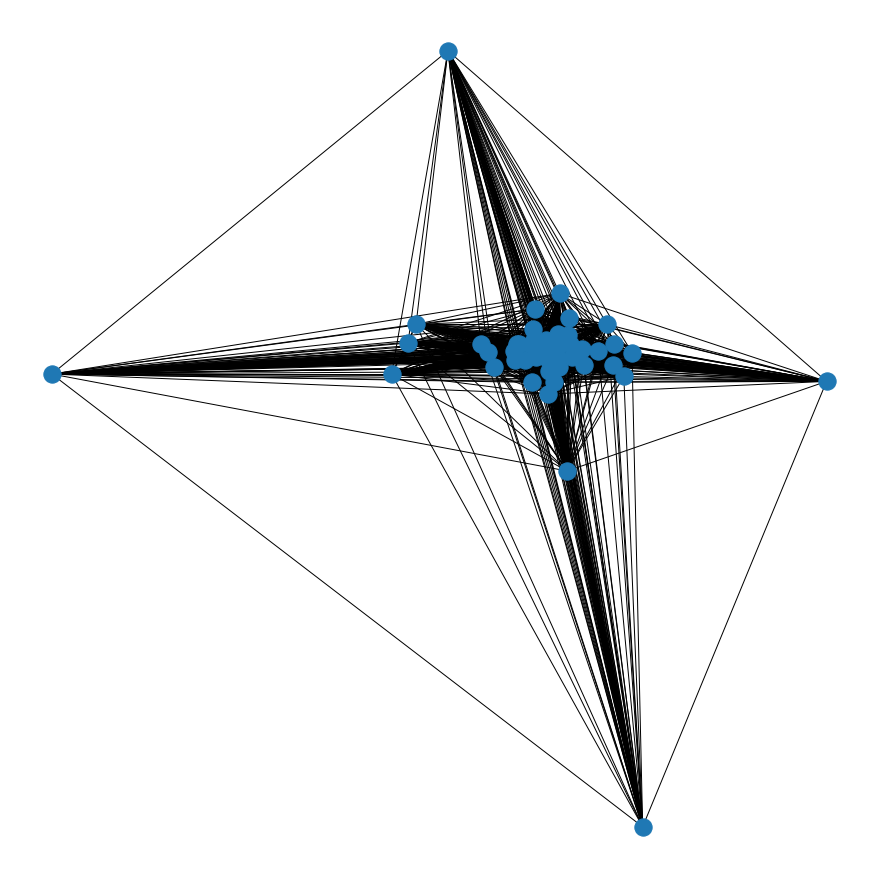

In [124]:
plt.figure(figsize=(12, 12))
G_pcy_n10=nx.from_pandas_edgelist(dfs10pcy,source='source',target='target')
nx.draw_spectral(G_pcy_n10)

(array([ 0.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.]),
 array([68.5, 68.6, 68.7, 68.8, 68.9, 69. , 69.1, 69.2, 69.3, 69.4, 69.5]),
 <a list of 10 Patch objects>)

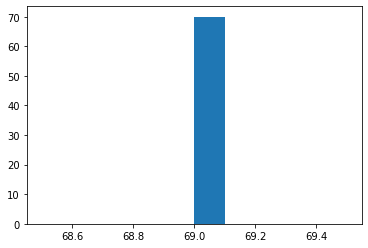

In [125]:
plt.hist([v for k,v in nx.degree(G_pcy_n10)])

### N = 50 

In [126]:
start_time_pcy50 = time.time()
# hash table
max_hash1 = 10*1000000
H1 = np.zeros((max_hash1,), dtype=np.int)
for key in readdata(k=2, report=True):
    hash_cell_1 = hash(key) % max_hash1
    H1[hash_cell_1] += 1

In [127]:
# compact hash table
H_good_1 = set(np.where(H1 >= N50)[0])

del H1

In [128]:
# find frequent 2-tuples
C2 = {}
for key in readdata(k=2):
    # hash-based filtering stage from PCY
    hash_cell_1 = hash(key) % max_hash1
    if hash_cell_1 not in H_good_1:
        continue

    # filter out non-frequent tuples
    if key not in C2N50_items:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1
        
print("{} items".format(len(C2)))

36 items


In [129]:
# filter stage
L2_PCY_N50 = {}
for key, count in C2.items():
    if count >= N50:
        L2_PCY_N50[key] = count
print('{} items with >{} occurances'.format(len(L2_PCY_N50), N50))
end_time_pcy50=time.time()
time_pcy50=start_time_pcy50-end_time_pcy50

36 items with >50 occurances


###  Generate rules A -> B

In [130]:
L2_PCY_N50 = [ elem for elem in list(L2_PCY_N50) if len(elem)>1] # clean our list a bit. 

for i in range(len(L2_PCY_N50)):

    A, B = list(L2_PCY_N50[i])
    support_AB = C2[frozenset([A, B])]
    support_A = C1N50[frozenset([A])]
    conf_A_leads_to_B = support_AB / support_A
    
    support_B = C1N50[frozenset([B])]
    prob_B = support_B / 2750.0
    
    interest_A_leads_to_B = conf_A_leads_to_B - prob_B
    
    if interest_A_leads_to_B > 0.7:
        print("{} --> {} with interest {:3f}".format(A, B, interest_A_leads_to_B))

rolls/buns --> whole milk with interest 120.956000
other vegetables --> whole milk with interest 120.956000
canned beer --> whole milk with interest 120.956000
bottled water --> whole milk with interest 120.956000
soda --> whole milk with interest 120.956000
newspapers --> whole milk with interest 120.956000
bottled beer --> whole milk with interest 120.956000
rolls/buns --> other vegetables with interest 61.977455
rolls/buns --> canned beer with interest 259.905455
rolls/buns --> bottled water with interest 66.975636
rolls/buns --> soda with interest 155.943273
rolls/buns --> newspapers with interest 53.980364
rolls/buns --> bottled beer with interest 119.956364
other vegetables --> canned beer with interest 259.905455
other vegetables --> bottled water with interest 66.975636
other vegetables --> soda with interest 155.943273
other vegetables --> newspapers with interest 53.980364
bottled beer --> other vegetables with interest 61.977455
bottled water --> canned beer with interest 25

In [131]:
# create DataFrame using data
# dfs100a=pd.DataFrame(L2N100.items(), columns=['basket', 'count'])
dfs50pcy=pd.DataFrame(L2_PCY_N50, columns=['source', 'target'])
dfs50pcy.head(10)

,source,target
0,rolls/buns,whole milk
1,other vegetables,whole milk
2,canned beer,whole milk
3,bottled water,whole milk
4,soda,whole milk
5,newspapers,whole milk
6,bottled beer,whole milk
7,rolls/buns,other vegetables
8,rolls/buns,canned beer
9,rolls/buns,bottled water


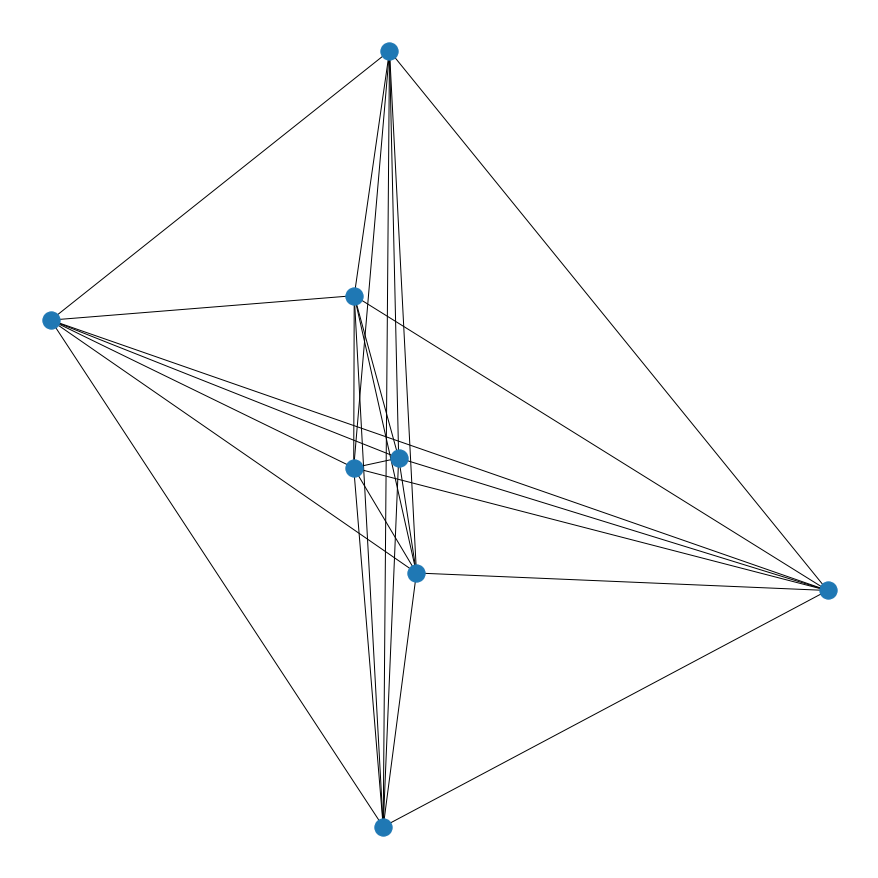

In [132]:
plt.figure(figsize=(12, 12))
G_pcy_n50=nx.from_pandas_edgelist(dfs50pcy,source='source',target='target')
nx.draw_spectral(G_pcy_n50)

(array([0., 0., 0., 0., 0., 8., 0., 0., 0., 0.]),
 array([6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5]),
 <a list of 10 Patch objects>)

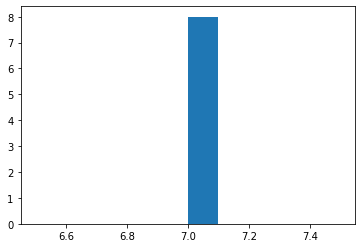

In [133]:
plt.hist([v for k,v in nx.degree(G_pcy_n50)])

### N = 100 

In [134]:
start_time_pcy100 = time.time()
# hash table
max_hash1 = 10*1000000
H1 = np.zeros((max_hash1,), dtype=np.int)
for key in readdata(k=2, report=True):
    hash_cell_1 = hash(key) % max_hash1
    H1[hash_cell_1] += 1

In [135]:
start_time_pcy100 = time.time()
# compact hash table
H_good_1 = set(np.where(H1 >= N100)[0])

del H1

In [136]:
# find frequent 2-tuples
C2 = {}
for key in readdata(k=2):
    # hash-based filtering stage from PCY
    hash_cell_1 = hash(key) % max_hash1
    if hash_cell_1 not in H_good_1:
        continue

    # filter out non-frequent tuples
    if key not in C2N100_items:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1
        
print("{} items".format(len(C2)))

15 items


In [137]:
# filter stage
L2_PCY_N100 = {}
for key, count in C2.items():
    if count >= N100:
        L2_PCY_N100[key] = count
print('{} items with >{} occurances'.format(len(L2_PCY_N100), N100))
end_time_pcy100=time.time()
time_pcy100=start_time_pcy100-end_time_pcy100

15 items with >100 occurances


### Generate rules A -> B

In [138]:
L2_PCY_N100 = [ elem for elem in list(L2_PCY_N100) if len(elem)>1] # clean our list a bit. 

for i in range(len(L2_PCY_N100)):

    A, B = list(L2_PCY_N100[i])
    support_AB = C2[frozenset([A, B])]
    support_A = C1N100[frozenset([A])]
    conf_A_leads_to_B = support_AB / support_A
    
    support_B = C1N100[frozenset([B])]
    prob_B = support_B / 2750.0
    
    interest_A_leads_to_B = conf_A_leads_to_B - prob_B
    
    if interest_A_leads_to_B > 0.7:
        print("{} --> {} with interest {:3f}".format(A, B, interest_A_leads_to_B))

rolls/buns --> whole milk with interest 120.956000
canned beer --> whole milk with interest 120.956000
soda --> whole milk with interest 120.956000
bottled beer --> whole milk with interest 120.956000
rolls/buns --> canned beer with interest 259.905455
rolls/buns --> soda with interest 155.943273
rolls/buns --> bottled beer with interest 119.956364
canned beer --> soda with interest 155.943273
bottled beer --> canned beer with interest 259.905455
bottled beer --> soda with interest 155.943273


In [139]:
# create DataFrame using data
# dfs100a=pd.DataFrame(L2N100.items(), columns=['basket', 'count'])
dfs100pcy=pd.DataFrame(L2_PCY_N100, columns=['source', 'target'])
dfs100pcy.head(10)

,source,target
0,rolls/buns,whole milk
1,canned beer,whole milk
2,soda,whole milk
3,bottled beer,whole milk
4,rolls/buns,canned beer
5,rolls/buns,soda
6,rolls/buns,bottled beer
7,canned beer,soda
8,bottled beer,canned beer
9,bottled beer,soda


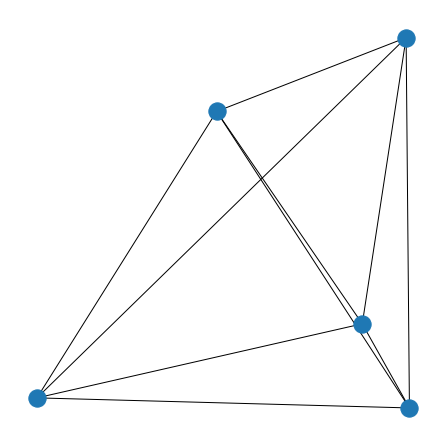

In [143]:
plt.figure(figsize=(6, 6))
G_pcy_n100=nx.from_pandas_edgelist(dfs100pcy,source='source',target='target')
nx.draw_random(G_pcy_n100)

(array([0., 0., 0., 0., 0., 5., 0., 0., 0., 0.]),
 array([3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5]),
 <a list of 10 Patch objects>)

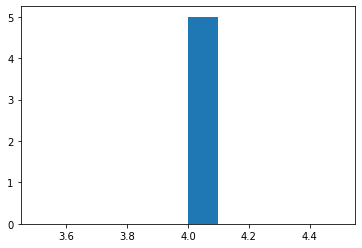

In [141]:
plt.hist([v for k,v in nx.degree(G_pcy_n100)])

In [144]:
print('total time consumed')
print()
print(f'N = 10  -> naive  : {time_naive10*-1:{15}} sec')
print(f'N = 10  -> apriori: {time_apriori10*-1:{15}} sec')
print(f'N = 10  -> pcy    : {time_pcy10*-1:{15}} sec')
print()
print(f'N = 50  -> naive  : {time_naive50*-1:{15}} sec')
print(f'N = 50  -> apriori: {time_apriori50*-1:{15}} sec')
print(f'N = 50  -> pcy    : {time_pcy50*-1:{15}} sec')
print()
print(f'N = 100 -> naive  : {time_naive100*-1:{15}} sec')
print(f'N = 100 -> apriori: {time_apriori100*-1:{15}} sec')
print(f'N = 100 -> pcy    : {time_pcy100*-1:{15}} sec')
print()

total time consumed

N = 10  -> naive  : 12.02414059638977 sec
N = 10  -> apriori: 56.12089443206787 sec
N = 10  -> pcy    : 125.07769799232483 sec

N = 50  -> naive  : 128.03057718276978 sec
N = 50  -> apriori: 30.031583786010742 sec
N = 50  -> pcy    : 134.53179121017456 sec

N = 100 -> naive  : 32.09468150138855 sec
N = 100 -> apriori: 30.110475778579712 sec
N = 100 -> pcy    : 47.60384178161621 sec

